## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing Pieces

### B.1 Import a Single Piece and Check Metadata for Title and Composer

- Here you will want to select the appropriate 'prefix' that identifies the location of your file.
- `'Music_Files/'` is for files in the local notebook; `'https://crimproject.org/mei/'` is for the files on CRIM.
- Then provide the full name (and extension) of your music file, such as `'CRIM_Model_0038.mei'`

In [2]:
# Select a prefix:
# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/' 


# Add your filename here
mei_file = 'CRIM_Model_0008.mei'

# These join the strings and import the piece
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)

{'title': 'Ave Maria', 'composer': 'Josquin Des Prés', 'date': 1502}


In [4]:
corpus = importScore('/Users/rfreedma/Downloads/MEI Test', verbose=True)

Successfully imported /Users/rfreedma/Downloads/MEI Test/CRIM_Model_0003.mei
Successfully imported /Users/rfreedma/Downloads/MEI Test/CRIM_Model_0002.mei
Successfully imported /Users/rfreedma/Downloads/MEI Test/CRIM_Model_0001.mei
Successfully imported /Users/rfreedma/Downloads/MEI Test/CRIM_Model_0005.mei
Successfully imported /Users/rfreedma/Downloads/MEI Test/CRIM_Model_0004.mei


In [5]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0014_3.mei',
                             'https://crimproject.org/mei/CRIM_Model_0009.mei'])
func = ImportedPiece.melodic  # <- NB there are no parentheses here
kwargs = {'kind': 'c', 'directed': False}
list_of_dfs = corpus.batch(func, kwargs)

output = pd.concat(list_of_dfs)
output

,1,2,3,4,Composer,Title,Date
0.0,Rest,NaN,Rest,Rest,Antoine de Févin,Missa Mente tota: Credo,1515
8.0,Rest,0,Rest,Rest,Antoine de Févin,Missa Mente tota: Credo,1515
12.0,NaN,2,NaN,NaN,Antoine de Févin,Missa Mente tota: Credo,1515
16.0,NaN,2,Rest,Rest,Antoine de Févin,Missa Mente tota: Credo,1515
22.0,NaN,2,NaN,NaN,Antoine de Févin,Missa Mente tota: Credo,1515
...,...,...,...,...,...,...,...
241.0,2,NaN,2,NaN,Pierre Cadéac,Je suis déshéritée,1540
242.0,0,3,1,3,Pierre Cadéac,Je suis déshéritée,1540
243.0,NaN,NaN,2,NaN,Pierre Cadéac,Je suis déshéritée,1540
244.0,NaN,2,2,1,Pierre Cadéac,Je suis déshéritée,1540


In [6]:
mel = piece.melodic()
piece.detailIndex(mel, t_sig=True)
bs = piece.beatStrengths()
bs = piece.beatStrengths()
piece.detailIndex(bs)

[Superius]  [Contratenor]  [Tenor]  [Bassus]
Measure Beat                                              
1       1.0         1.00           1.00     1.00      1.00
        3.0         0.50            NaN     0.50      0.50
2       1.0         1.00           1.00     1.00      1.00
        2.0         0.25            NaN      NaN      0.25
        3.0          NaN           0.50     0.50       NaN
...                  ...            ...      ...       ...
242     2.0          NaN           0.25      NaN       NaN
        2.0          NaN            NaN     0.25       NaN
243     1.0          NaN           0.50     0.50       NaN
        3.0          NaN            NaN     0.50       NaN
        9.0         1.00            NaN      NaN       NaN

[1098 rows x 4 columns]

In [7]:
mel = piece.melodic()
mel.stack().nunique()

28

In [176]:
nr = piece.notes()
nr.count()
nr.stack().nunique()

29

In [177]:
nr.apply(pd.Series.value_counts).fillna(0).astype(int)  

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
A3,0,4,46,41,37
A4,64,61,0,1,0
B-2,0,0,0,0,1
B-3,0,11,46,52,27
B-4,59,15,0,0,0
B3,0,1,1,2,0
B4,1,0,0,0,0
C#4,0,2,1,0,0
C#5,4,0,0,0,0
C3,0,0,0,0,20


In [178]:
nr.apply(pd.Series.value_counts).fillna(0).astype(int)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
A3,0,4,46,41,37
A4,64,61,0,1,0
B-2,0,0,0,0,1
B-3,0,11,46,52,27
B-4,59,15,0,0,0
B3,0,1,1,2,0
B4,1,0,0,0,0
C#4,0,2,1,0,0
C#5,4,0,0,0,0
C3,0,0,0,0,20


In [58]:
nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values(by=nr.columns[0], ascending=False)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
D5,81,0,0,0,0
C5,64,2,0,0,0
A4,64,61,0,1,0
B-4,59,15,0,0,0
G4,41,90,11,12,0
E5,19,0,0,0,0
Rest,18,22,25,26,28
F5,16,0,0,0,0
E-5,8,0,0,0,0
F#4,5,4,0,0,0


In [179]:
mel = piece.melodic() 
mel.count()


Superius         383
Contratenor      436
PrimusTenor      373
SecundusTenor    375
Bassus           339
dtype: int64

In [194]:
nr = piece.notes()
nr.loc[:, ['Superius', 'Bassus']]


,Superius,Bassus
0.0,G4,Rest
4.0,D5,NaN
10.0,C5,NaN
12.0,D5,NaN
14.0,F5,NaN
...,...,...
1065.0,NaN,F3
1066.0,NaN,G3
1068.0,NaN,E-3
1070.0,NaN,C3


In [197]:
nr = piece.notes().head(10)
mel_short = piece.melodic(df=nr)
mel_short

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,NaN,Rest,Rest,Rest,Rest
4.0,P5,NaN,NaN,NaN,NaN
10.0,-M2,NaN,NaN,NaN,NaN
12.0,M2,NaN,NaN,NaN,NaN
14.0,m3,NaN,NaN,NaN,NaN
16.0,-m2,P4,NaN,NaN,NaN
18.0,-M2,NaN,NaN,NaN,NaN
21.0,-M2,NaN,NaN,NaN,NaN
22.0,-m3,-M2,NaN,NaN,NaN
24.0,m2,M2,NaN,NaN,NaN


In [201]:
nr_no_unisons = piece.notes(combineUnisons=True)
piece.melodic(df=nr_no_unisons, unit=1).fillna('')

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,,Rest,Rest,Rest,Rest
1.0,P1,Rest,Rest,Rest,Rest
2.0,P1,Rest,Rest,Rest,Rest
3.0,P1,Rest,Rest,Rest,Rest
4.0,P5,Rest,Rest,Rest,Rest
...,...,...,...,...,...
1083.0,P1,P1,P1,P1,P1
1084.0,P1,P1,P1,P1,P1
1085.0,P1,P1,P1,P1,P1
1086.0,P1,P1,P1,P1,P1


In [211]:
piece.melodic(end=False)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,P5,Rest,Rest,Rest,Rest
4.0,-M2,NaN,NaN,NaN,NaN
8.0,NaN,Rest,Rest,Rest,Rest
10.0,M2,NaN,NaN,NaN,NaN
12.0,m3,P4,NaN,NaN,NaN
...,...,...,...,...,...
1064.0,NaN,-M2,NaN,NaN,m2
1065.0,NaN,NaN,NaN,NaN,M2
1066.0,NaN,P4,NaN,-M2,-M3
1068.0,NaN,-m2,NaN,-m2,-m3


In [215]:
nr_no_unison = piece.notes(combineUnisons=True)
no_unison_durs = piece.durations(df = nr_no_unison)
no_unison_durs

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,4.0,12.0,32.0,66.0,44.0
4.0,6.0,NaN,NaN,NaN,NaN
10.0,2.0,NaN,NaN,NaN,NaN
12.0,2.0,4.0,NaN,NaN,NaN
14.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1065.0,NaN,NaN,NaN,NaN,1.0
1066.0,NaN,2.0,NaN,2.0,2.0
1068.0,NaN,4.0,NaN,4.0,2.0
1070.0,NaN,NaN,NaN,NaN,2.0


In [219]:
harm = piece.harmonic()
harm.iloc[0:10, 0:2]

,Bassus_SecundusTenor,Bassus_PrimusTenor
0.0,Rest,Rest
4.0,NaN,NaN
8.0,Rest,Rest
10.0,NaN,NaN
12.0,NaN,NaN
14.0,NaN,NaN
16.0,Rest,Rest
18.0,NaN,NaN
21.0,NaN,NaN
22.0,NaN,NaN


In [230]:
mel = piece.melodic()
_n = 5
ngrams = piece.ngrams(df = mel, n = _n)
ngramDurations = piece.durations(df = mel, n = _n, mask_df = ngrams) 
ngramDurations
ngrams

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
4.0,"(P5, -M2, M2, m3, -m2)",NaN,NaN,NaN,NaN
10.0,"(-M2, M2, m3, -m2, -M2)",NaN,NaN,NaN,NaN
12.0,"(M2, m3, -m2, -M2, -M2)",NaN,NaN,NaN,NaN
14.0,"(m3, -m2, -M2, -M2, -m3)",NaN,NaN,NaN,NaN
16.0,"(-m2, -M2, -M2, -m3, m2)","(P4, -M2, M2, m3, -m2)",NaN,NaN,NaN
...,...,...,...,...,...
1058.0,NaN,"(-m2, m2, -m2, -M2, -M2)",NaN,"(-M2, M2, m3, -m2, -M2)",NaN
1060.0,NaN,"(m2, -m2, -M2, -M2, P4)",NaN,"(M2, m3, -m2, -M2, -m2)","(-P5, M2, M2, m2, M2)"
1063.0,NaN,"(-m2, -M2, -M2, P4, -m2)",NaN,NaN,"(M2, M2, m2, M2, -M3)"
1064.0,NaN,NaN,NaN,NaN,"(M2, m2, M2, -M3, -m3)"


In [252]:
thing = piece.lyrics()
piece.detailIndex(thing, t_sig=True, offset=True)

Superius  \
Measure Beat Offset TSig                                    
1       1.0  0.0    4/2    \n            Vi\n           -   
        3.0  4.0    4/2    -\n            di\n              
2       2.0  10.0   4/2   \n            spe\n           -   
        3.0  12.0   4/2   -\n            ci\n           -   
        4.0  14.0   4/2    -\n            o\n           -   
...                                                   ...   
132     4.0  1062.0 4/2                               NaN   
133     2.0  1066.0 4/2                               NaN   
        3.0  1068.0 4/2                               NaN   
        4.0  1070.0 4/2                               NaN   
134     1.0  1072.0 8/2                               NaN   

                                             Contratenor PrimusTenor  \
Measure Beat Offset TSig                                               
1       1.0  0.0    4/2                              NaN         NaN   
        3.0  4.0    4/2                              NaN         NaN   
2       2.0  10.0   4/2                              NaN         NaN   
        3.0  12.0   4/2   \n            Vi\n           -         NaN   
        4.0  14.0   4/2                              NaN         NaN   
...                                                  ...         ...   
132     4.0  1062.0 4/2                              NaN         NaN   
133     2.0  1066.0 4/2                              NaN         NaN   
        3.0  1068.0 4/2                              NaN         NaN   
        4.0  1070.0 4/2                              NaN         NaN   
134     1.0  1072.0 8/2                              NaN         NaN   

                                            SecundusTenor  \
Measure Beat Offset TSig                                    
1       1.0  0.0    4/2                               NaN   
        3.0  4.0    4/2                               NaN   
2       2.0  10.0   4/2                               NaN   
        3.0  12.0   4/2                               NaN   
        4.0  14.0   4/2                               NaN   
...                                                   ...   
132     4.0  1062.0 4/2    \n            or\n           -   
133     2.0  1066.0 4/2   -\n            di\n           -   
        3.0  1068.0 4/2   -\n            na\n           -   
        4.0  1070.0 4/2                               NaN   
134     1.0  1072.0 8/2   -\n            ta?\n              

                                                   Bassus  
Measure Beat Offset TSig                                   
1       1.0  0.0    4/2                               NaN  
        3.0  4.0    4/2                               NaN  
2       2.0  10.0   4/2                               NaN  
        3.0  12.0   4/2                               NaN  
        4.0  14.0   4/2                               NaN  
...                                                   ...  
132     4.0  1062.0 4/2                               NaN  
133     2.0  1066.0 4/2                               NaN  
        3.0  1068.0 4/2   -\n            di\n           -  
        4.0  1070.0 4/2   -\n            na\n           -  
134     1.0  1072.0 8/2   -\n            ta?\n             

[528 rows x 5 columns]

In [266]:
mel = piece.melodic(kind = "c", compound = True)
har = piece.harmonic(kind = "c", compound = True)
ngrams = piece.ngrams(df=har, other=mel)
ngrams
# ngrams.iloc[0,0]

,Bassus_SecundusTenor,Bassus_PrimusTenor,Bassus_Contratenor,Bassus_Superius,SecundusTenor_PrimusTenor,SecundusTenor_Contratenor,SecundusTenor_Superius,PrimusTenor_Contratenor,PrimusTenor_Superius,Contratenor_Superius
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"12_Held, 15_5, 9"
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15_5, 9_Held, 7"
16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9_Held, 7_Held, 5"
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7_Held, 5_-2, 4"
21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5_-2, 4_2, 3"
...,...,...,...,...,...,...,...,...,...,...
1063.0,"13_2, 11_1, 10","5_2, 3_1, 2","12_2, 8_1, 7","17_2, 15_1, 14",NaN,"-1_Held, -3_-1, -4",NaN,"7_0, 5_Held, 3",NaN,"5_-2, 7_-2, 9"
1064.0,"11_1, 10_2, 7","3_1, 2_2, 0","8_1, 7_2, 3","15_1, 14_2, 12","-8_-1, -7_-2, -5","-3_-1, -4_-2, 3","4_-1, 5_-2, 7","5_Held, 3_Held, 8",NaN,"7_-2, 9_5, 4"
1065.0,"10_2, 7_-4, 9","2_2, 0_-4, 4","7_2, 3_-4, 12","14_2, 12_-4, 16",NaN,NaN,NaN,NaN,NaN,NaN
1066.0,"7_-4, 9_-3, 12","0_-4, 4_-3, 7","3_-4, 12_-3, 15","12_-4, 16_-3, 19","-7_-2, -5_-1, -4","-4_-2, 3_-1, 3","5_-2, 7_-1, 8","3_Held, 8_Held, 7",NaN,"9_5, 4_-1, 5"


In [267]:
ng = piece.ngrams(df=piece.melodic(kind='d'), n=3)
ng

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
4.0,"(5, -2, 2)",NaN,NaN,NaN,NaN
10.0,"(-2, 2, 3)",NaN,NaN,NaN,NaN
12.0,"(2, 3, -2)",NaN,NaN,NaN,NaN
14.0,"(3, -2, -2)",NaN,NaN,NaN,NaN
16.0,"(-2, -2, -2)","(4, -2, 2)",NaN,NaN,NaN
...,...,...,...,...,...
1063.0,NaN,"(-2, -2, -2)",NaN,NaN,"(2, 2, 2)"
1064.0,NaN,"(-2, -2, 4)",NaN,NaN,"(2, 2, 2)"
1065.0,NaN,NaN,NaN,NaN,"(2, 2, -3)"
1066.0,NaN,"(-2, 4, -2)",NaN,"(-2, -2, -2)","(2, -3, -3)"


In [274]:
test = ng.iloc[0,0]
test

('5', '-2', '2')

In [275]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

In [277]:
result = convertTuple(test)
type(result)

str

In [281]:
converted_ngs = ng.applymap(convertTuple)
first_cell = converted_ngs.iloc[-1,-1]
type(first_cell)

str

In [282]:
converted_ngs

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
4.0,"5, -2, 2",,,,
10.0,"-2, 2, 3",,,,
12.0,"2, 3, -2",,,,
14.0,"3, -2, -2",,,,
16.0,"-2, -2, -2","4, -2, 2",,,
...,...,...,...,...,...
1063.0,,"-2, -2, -2",,,"2, 2, 2"
1064.0,,"-2, -2, 4",,,"2, 2, 2"
1065.0,,,,,"2, 2, -3"
1066.0,,"-2, 4, -2",,"-2, -2, -2","2, -3, -3"


In [31]:
# set parameters
combineUnisons = True
combineRests = True
# new pitch table
pitch_order = ['E-2', 'E2', 'F2', 'F#2', 'G2', 'A2', 'B-2', 'B2', 
               'C3', 'C#3', 'D3', 'E-3','E3', 'F3', 'F#3', 'G3', 'G#3','A3', 'B-3','B3',
               'C4', 'C#4','D4', 'E-4', 'E4', 'F4', 'F#4','G4', 'A4', 'B-4', 'B4',
               'C5', 'C#5','D5', 'E-5','E5', 'F5', 'F#5', 'G5', 'A5', 'B-5', 'B5']

nr = piece.notes(combineUnisons ='combineUnisons', combineRests = 'combineRests').fillna('-')  
nr = nr.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()  
nr.rename(columns = {'index':'pitch'}, inplace = True)  
nr['pitch'] = pd.Categorical(nr["pitch"], categories=pitch_order)  
nr = nr.sort_values(by = "pitch").dropna().copy()  
voices = nr.columns.to_list() 
display(nr)
px.bar(nr, x="pitch", y=voices, title="Distribution of Pitches in " + 
       piece.metadata['composer'] + ": " + piece.metadata['title'])

,pitch,[Superius],Altus,Tenor,Bassus
23,G2,0,0,0,3
1,A2,0,0,0,4
4,B-2,0,0,0,1
6,B2,0,0,0,4
9,C3,0,0,0,36
12,D3,0,0,0,14
15,E3,0,0,0,27
20,F3,0,2,0,27
18,F#3,0,0,0,7
24,G3,0,18,13,40


In [32]:
# new mel
# set parameters
kind = 'q'
directed = True
compound = True

interval_order_quality = ["-P8", "-M7", "-m7", "-M6", "-m6", "-P5", "-P4", "-M3", 
                          "-m3", "-M2", "-m2", "P1", "m2", "M2", "m3", "M3",
                          "P4", "P5", "m6", "M6", "m7", "M7", "P8"]
mel = piece.melodic(kind = kind, directed = directed, compound = compound)
mel = mel.fillna("-")
# count up the values in each item column--sum for each pitch.  
# make a copy 
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)
# apply the categorical list and sort
if kind == 'q':
    mel['interval'] = pd.Categorical(mel["interval"], categories=interval_order_quality)
mel = mel.sort_values(by = "interval").dropna().copy()
voices = mel.columns.to_list()

display(mel)
# collect and print information about composer and piece
px.bar(mel, x="interval", y=voices, title="Distribution of Melodic Intervals in " + 
       piece.metadata['composer'] + ": " + piece.metadata['title'])

,interval,[Superius],Altus,Tenor,Bassus
5,-P8,0,2,0,0
4,-P5,0,6,0,9
3,-P4,0,2,0,3
2,-M3,8,6,9,12
7,-m3,8,17,12,11
1,-M2,54,74,53,35
6,-m2,29,29,25,22
11,P1,40,37,36,28
16,m2,21,27,20,22
8,M2,44,51,44,43


In [20]:
# new har

kind = 'd'
directed = True
compound = True

interval_order_quality = ["-P8", "-M7", "-m7", "-M6", "-m6", "-P5", "-P4", "-M3", 
                          "-m3", "-M2", "-m2", "P1", "m2", "M2", "m3", "M3",
                          "P4", "P5", "m6", "M6", "m7", "M7", "P8"]
har = piece.harmonic(kind = kind, directed = directed, compound = compound)
har = har.fillna("-")
# count up the values in each item column--sum for each pitch.  
# make a copy 
har = har.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
# rename the index column to something more useful
har.rename(columns = {'index':'interval'}, inplace = True)
# apply the categorical list and sort
if kind == 'q':
    har['interval'] = pd.Categorical(har["interval"], categories=interval_order_quality)
har = har.sort_values(by = "interval").dropna().copy()
voices = har.columns.to_list()
# collect and print information about composer and piece
px.bar(har, x="interval", y=voices, title="Distribution of Harmonic Intervals in " + 
       piece.metadata['composer'] + ": " + piece.metadata['title'])


In [30]:
# entry ngrams
# set parameters

combineUnisons = True
combineRests = True
kind = 'd'
directed = True
compound = True
ngram_length = 4
thematic = True
anywhere = True
entries_only = True

nr = piece.notes(combineUnisons = combineUnisons)
mel = piece.melodic(df = nr, 
                kind = kind,
                directed = directed,
                compound = compound,
                end = False)

# this is for entries only
if entries_only == True:    
# pass the following ngrams to the plot below as first df
    entry_ngrams = piece.entries(df = mel, 
                                n = ngram_length, 
                                thematic = True, 
                                anywhere = True)

    # pass the ngram durations below to the plot as second df
    entry_ngrams_duration = piece.durations(df = mel, 
                                        n =ngram_length, 
                                        mask_df = entry_ngrams)
    # make the heatmap
    entry_ng_heatmap = viz.plot_ngrams_heatmap(entry_ngrams, 
                                     entry_ngrams_duration, 
                                     selected_patterns=[], 
                                     voices=[], 
                                     heatmap_width= 1000,
                                     heatmap_height=300, 
                                     includeCount=True)
    # rename entry_ngrams df as mel_ngrams for display
    entry_ngrams_detail = piece.detailIndex(entry_ngrams, offset = True)
    # display the results
    display(entry_ngrams_detail)
    ng_heatmap = viz.plot_ngrams_heatmap(entry_ngrams, 
                                         entry_ngrams_duration, 
                                         selected_patterns=[], 
                                         voices=[], 
                                         heatmap_width = 1000,
                                         heatmap_height=300, 
                                         includeCount=True)

    display(ng_heatmap)
    
else:
    mel_ngrams = piece.ngrams(df = mel, n = ngram_length)

    mel_ngrams_duration = piece.durations(df = mel, 
                                      n =ngram_length)

    ng_heatmap = viz.plot_ngrams_heatmap(mel_ngrams, 
                                     mel_ngrams_duration, 
                                     selected_patterns=[], 
                                     voices=[], 
                                     heatmap_width = 1000,
                                     heatmap_height=300, 
                                     includeCount=True)

    mel_ngrams_detail = piece.detailIndex(mel_ngrams, offset = True)  
    # display the results
    display(mel_ngrams_detail)
    ng_heatmap = viz.plot_ngrams_heatmap(mel_ngrams, 
                                         mel_ngrams_duration, 
                                         selected_patterns=[], 
                                         voices=[], 
                                         heatmap_width = 1000,
                                         heatmap_height=300, 
                                         includeCount=True)

    display(ng_heatmap)

[Superius]                Altus           Tenor  \
Measure Beat Offset                                                             
1       1.0  0.0           (4, 2, 2, -3)                  NaN             NaN   
        3.0  4.0        (2, 2, -3, Rest)                  NaN             NaN   
3       1.0  16.0                    NaN        (4, 2, 2, -3)             NaN   
        3.0  20.0                    NaN     (2, 2, -3, Rest)             NaN   
5       1.0  32.0                    NaN                  NaN   (4, 2, 2, -3)   
...                                  ...                  ...             ...   
140     2.5  1179.0                  NaN                  NaN             NaN   
143     1.0  1200.0        (2, 2, 2, -2)  (2, -2, Rest, Rest)  (-2, -2, 2, 2)   
144     1.0  1208.0                  NaN                  NaN             NaN   
        3.0  1212.0  (2, -2, Rest, Rest)                  NaN             NaN   
147     3.0  1236.0      (-2, -2, -2, 2)                  NaN  (-2, 2, 2, -2)   

                                  Bassus  
Measure Beat Offset                       
1       1.0  0.0                     NaN  
        3.0  4.0                     NaN  
3       1.0  16.0                    NaN  
        3.0  20.0                    NaN  
5       1.0  32.0                    NaN  
...                                  ...  
140     2.5  1179.0  (2, -2, Rest, Rest)  
143     1.0  1200.0      (5, -2, -2, -2)  
144     1.0  1208.0     (-2, -2, -2, -2)  
        3.0  1212.0                  NaN  
147     3.0  1236.0                  NaN  

[203 rows x 4 columns]

alt.VConcatChart(...)

In [167]:
import glob
# corpus_list = []
# for name in glob.glob('Music_Files/*'):
#     piece = importScore(name)
#     piece.verovioPrintExample(1, 3)

In [170]:
ms = piece.measures()
measure_starts = ms.index.to_list()
nr = piece.notes()
nr2 = nr[nr.index.isin(measure_starts)]
nr2
# nr.head(20)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,G4,Rest,Rest,Rest,Rest
16.0,E5,G4,NaN,NaN,NaN
24.0,B-4,G4,NaN,NaN,NaN
32.0,NaN,NaN,G3,NaN,NaN
40.0,B-4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1040.0,G4,B-3,G3,E-4,G3
1048.0,G4,B-3,G3,D4,Rest
1056.0,G4,NaN,G3,NaN,G3
1064.0,G4,C4,G3,NaN,E3


In [172]:
nr.index.isin(measure_starts)

array([ True, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False,

In [175]:
#df of measures (that is, where each starts)
ms = piece.measures()
#index of that df as list
measure_starts = ms.index.to_list()
#df of notes and rests
nr = piece.notes()
#filter nr to show only those offsets (=index=) that are in the list just made
nr2 = nr.loc[nr.index.isin(measure_starts)]
nr2


,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,G4,Rest,Rest,Rest,Rest
16.0,E5,G4,NaN,NaN,NaN
24.0,B-4,G4,NaN,NaN,NaN
32.0,NaN,NaN,G3,NaN,NaN
40.0,B-4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1040.0,G4,B-3,G3,E-4,G3
1048.0,G4,B-3,G3,D4,Rest
1056.0,G4,NaN,G3,NaN,G3
1064.0,G4,C4,G3,NaN,E3


In [166]:
#get the notes
nr = piece.notes()
#stack the voices on top of each other to make a series
nr_stacked = nr.stack()
#find the beat strengths
bs = piece.beatStrengths()
#stack and filter the beat strengths according to some threshold
strong_beats = bs.stack() > .75
#filter the stacked notes and unstack
strong_notes = nr_stacked[strong_beats].unstack()
#find the melodic intervals among those 'strong' notes
mel_strong = piece.melodic(df=strong_notes, kind='d')
#and at last find the ngrams for those strong notes
strong_ngrams = piece.ngrams(df=mel_strong, n=4, exclude=['Rest']).fillna('')
strong_ngrams


,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
16.0,"(6, -4, 1, -3)",,,,
24.0,,"(1, 1, -3, 2)",,,
48.0,,"(1, -3, 2, 3)","(6, -4, 3, -5)",,
56.0,,"(-3, 2, 3, 1)","(-4, 3, -5, 6)",,"(1, -2, -2, 4)"
64.0,,"(2, 3, 1, -3)","(3, -5, 6, 1)",,"(-2, -2, 4, 3)"
...,...,...,...,...,...
1008.0,"(4, -2, -4, 1)",,"(-3, 1, -2, 1)","(-2, 2, -6, 6)",
1016.0,"(-2, -4, 1, 1)",,"(1, -2, 1, 1)","(2, -6, 6, -2)",
1024.0,,,"(-2, 1, 1, 1)",,
1032.0,,,,"(-6, 6, -2, -3)",


In [ ]:
#define the corpus
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0014_3.mei',
                         'https://crimproject.org/mei/CRIM_Model_0009.mei'])
#specify the function 
func = ImportedPiece.melodic  # <- NB there are no parentheses here
#provide the kwargs
kwargs = {'kind': 'c', 'directed': False}
#build a list of dataframes, one for each piece in the corpus
list_of_dfs = corpus.batch(func, kwargs)
#concatenate the list to a single dataframe
output = pd.concat(list_of_dfs)

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,G4,Rest,Rest,Rest,Rest
16.0,E5,G4,NaN,NaN,NaN
24.0,B-4,G4,NaN,NaN,NaN
32.0,NaN,NaN,G3,NaN,NaN
40.0,B-4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1040.0,G4,B-3,G3,E-4,G3
1048.0,G4,B-3,G3,D4,Rest
1056.0,G4,NaN,G3,NaN,G3
1064.0,G4,C4,G3,NaN,E3


In [ ]:
open(path, "r") as file:
    to_import = file.read()
    mei_doc = ET.fromstring(to_import)

## C.  Get Table of Notes and Rests

* **CRIM Intervals** is based on **Pandas**, which is a **Python** code library
<br>

* **Pandas Data Frames** are tables that can be processed in all kinds of ways (search for patterns, statistics, visualizations, etc).
<br>

* The column at the left of these data frames is an **index**, in this case corresponding to the **offset** numbers from music21. An offset of 1.0 corresponds to one quarter note. 
<br>

* Note that music21 uses `zero-based indexing`, so that the first note of the piece is **0**.




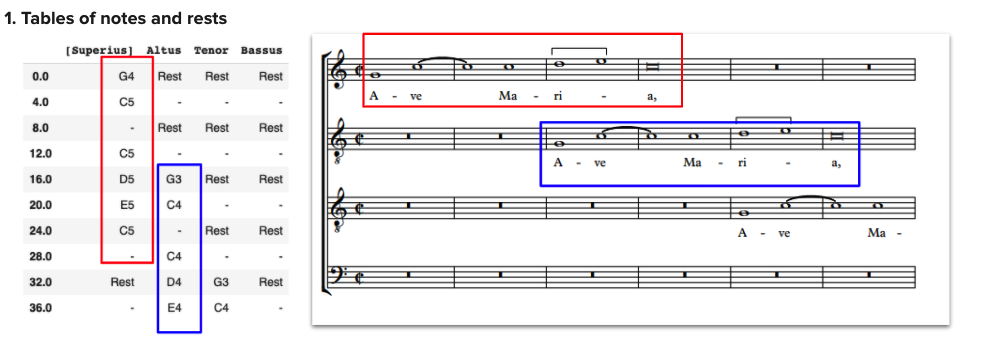

### C.1  Get Table of Notes and Rests

* Most methods in CRIM Intervals involve combining the reference to your **`piece`** with **`SomeMethod()`**, for example:  

>**`piece.notes()`**.  Note that the parentheses are required!
<br>

* In the Pandas library, results are posted in a  **data frame**, roughly like an **Excel** spreadsheet. Long data frames are automatically abbreviated to show only the **first five** and **last five** rows. 
<br>

* To see more rows, try **`piece.notes.head(20)`** (which is the first 20 rows), or **`piece.notes.tail(20)`**, which is the last 20 rows.
<br>
* Or save a CSV of the entire output with: **`piece.notes.to_csv('saved_csv/List_all_Notes.csv')`**
    * (You can replace **`List_all_Notes`** with any file name you prefer.  The resulting file will be in the **`saved_csv`** folder in your notebook.  You can then download it to your computer.)
<br>

* Do you want to combine unisons?

    * adding **`combineUnisons=True`** to the request for notesRests will combine all unisons to a single note. The total duration will be the same as for the individual notes.


### Print the Documentation

In [18]:
print(ImportedPiece.notes.__doc__)


        Return a table of the notes and rests in the piece. Rests are
        designated with the string "Rest". Notes are shown such that middle C
        is "C4".
        If `combineRests` is True (default), non-first consecutive rests will be
        removed, effectively combining consecutive rests in each voice.
        `combineUnisons` works the same way for consecutive attacks on the same
        pitch in a given voice, however, `combineUnisons` defaults to False.
        


In [15]:

piece.detailIndex(piece.notes()).fillna('-')

[Superius] Altus Tenor Bassus
Measure Beat                              
1       1.0          G4  Rest  Rest   Rest
        3.0          C5     -     -      -
2       3.0          C5     -     -      -
3       1.0          D5    G3     -      -
        3.0          E5    C4     -      -
...                 ...   ...   ...    ...
149     1.0          C5    E4    C4     A3
        3.0           -    F4     -      -
150     1.0          B4    G4    D4     G3
151     1.0          C5    G4    C4     C3
152     1.0          C5    G4    C4     C3

[544 rows x 4 columns]

###  Combine Unisons

In [4]:
nr_no_unisons = piece.notes(combineUnisons=True)
nr_no_unisons.head(20)

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,NaN,NaN,NaN
16.0,D5,G3,NaN,NaN
20.0,E5,C4,NaN,NaN
24.0,C5,NaN,NaN,NaN
32.0,Rest,D4,G3,NaN
36.0,NaN,E4,C4,NaN
40.0,NaN,C4,NaN,NaN
48.0,NaN,Rest,D4,G2
52.0,NaN,NaN,E4,C3


### C.2  Removing NaN

* Missing values (such as when one voice has a new note at a given offset but another voice simply continues the previous note or rest) are marked in data frames as **NaN**, which stands for **Not a Number**. Sometimes it is helpful to remove these, either for human readers or for other data processing you might need to perform.
<br>
* You can replace NaN by adding **`fillna("-")`** to your request for Notes and Rests:

> `piece.notes().fillna("-")`.
<br>

* And by giving the entire expression a name with (such as `nr` you can quite easily reuse the entire request in a subsequent step:

>`nr = piece.notes().fillna("-")`

In [5]:
nr = piece.notes().fillna("-")
nr.head(50)

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,-,-,-
12.0,C5,-,-,-
16.0,D5,G3,-,-
20.0,E5,C4,-,-
24.0,C5,-,-,-
28.0,-,C4,-,-
32.0,Rest,D4,G3,-
36.0,-,E4,C4,-
40.0,-,C4,-,-


### C.3  Count, Sort and Graph Notes

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  
>`nr.count`

    * **rename a columns**:  
>`nr.rename(columns = {'[Superius]':'Cantus'})`

    * **stack all the columns** on top of each other to get one list of all the notes:  
>`nr.stack()`

    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece):
>`nr.stack().nunique()`

    * **count the number of each note in each part**:  
>`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`

    * **count and sort** the number of notes in a single voice part: 
    
>`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values(by=nr.columns[0], ascending=False)`
    
* This sorts by the first voice in the score.  If you want to sort by the last, then use `by=nr.columns[-1]` in he request.



In [6]:
# Counts of notes in Each part, sorted alphabetically by note
nr.apply(pd.Series.value_counts).fillna(0).astype(int)

# or sorted by the counts in the first voice:
nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values(by=nr.columns[0], ascending=False)


,[Superius],Altus,Tenor,Bassus
-,285,223,292,306
C5,62,0,0,0
B4,41,1,0,0
D5,38,0,0,0
G4,31,47,17,0
E5,31,0,0,0
A4,23,10,4,0
Rest,20,24,19,17
F5,4,0,0,0
E4,4,42,33,0


### C.2 Sort Pitches from Low to High

The previous cell simply sorts the columns by the **counts** of the pitches in a particular voice.  

But we can also declare a **sort order** for the pitches themselves, then organize the entire data frame in that sequence.  This will show the voice ranges of each part.

We first create a list of the pitches in order (from low to high, in this case).  Note that music21 (and thus CRIM Intervals) represents **B-flat** as **B-**.  **C-sharp** is **C#**.

```
pitch_order = ['E-2', 'E2', 'F2', 'F#2', 'G2', 'A2', 'B-2', 'B2', 
               'C3', 'C#3', 'D3', 'E-3','E3', 'F3', 'F#3', 'G3', 'G#3','A3', 'B-3','B3',
               'C4', 'C#4','D4', 'E-4', 'E4', 'F4', 'F#4','G4', 'A4', 'B-4', 'B4',
               'C5', 'C#5','D5', 'E-5','E5', 'F5', 'F#5', 'G5', 'A5', 'B-5', 'B5']`
```


In [59]:
# set your order of pitches
pitch_order = ['E-2', 'E2', 'F2', 'F#2', 'G2', 'A2', 'B-2', 'B2', 
               'C3', 'C#3', 'D3', 'E-3','E3', 'F3', 'F#3', 'G3', 'G#3','A3', 'B-3','B3',
               'C4', 'C#4','D4', 'E-4', 'E4', 'F4', 'F#4','G4', 'A4', 'B-4', 'B4',
               'C5', 'C#5','D5', 'E-5','E5', 'F5', 'F#5', 'G5', 'A5', 'B-5', 'B5']

# get notes and rests, then fill the NA's (which are Nulls and will confuse things)
nr = piece.notes()
nr.fillna('-')

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
nr = nr.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
nr.rename(columns = {'index':'pitch'}, inplace = True)

# apply the categorical list and sort
nr['pitch'] = pd.Categorical(nr["pitch"], categories=pitch_order)
nr = nr.sort_values(by = "pitch").dropna().copy()
nr

,pitch,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
2,B-2,0,0,0,0,1
9,C3,0,0,0,0,20
12,D3,0,0,1,0,44
15,E-3,0,0,0,0,20
18,E3,0,0,0,0,11
22,F3,0,0,4,3,40
25,G3,0,7,37,33,73
0,A3,0,4,46,41,37
3,B-3,0,11,46,52,27
5,B3,0,1,1,2,0


### Voice Ranges as a Chart

There are Python libraries for many different kinds of graphs and charts.  

Here will will use **Seaborn** and **Matplot** to create a histogram of the counts of each pitch in each voice.  The result is a nice graphical summary of the overlapping ranges.

You can choose various colors and other options (too many to explain here, but see:  https://www.codecademy.com/article/seaborn-design-ii)

title : Missa Virginis Mariae: Credo
composer : Pierre Clereau


<AxesSubplot: xlabel='pitch'>

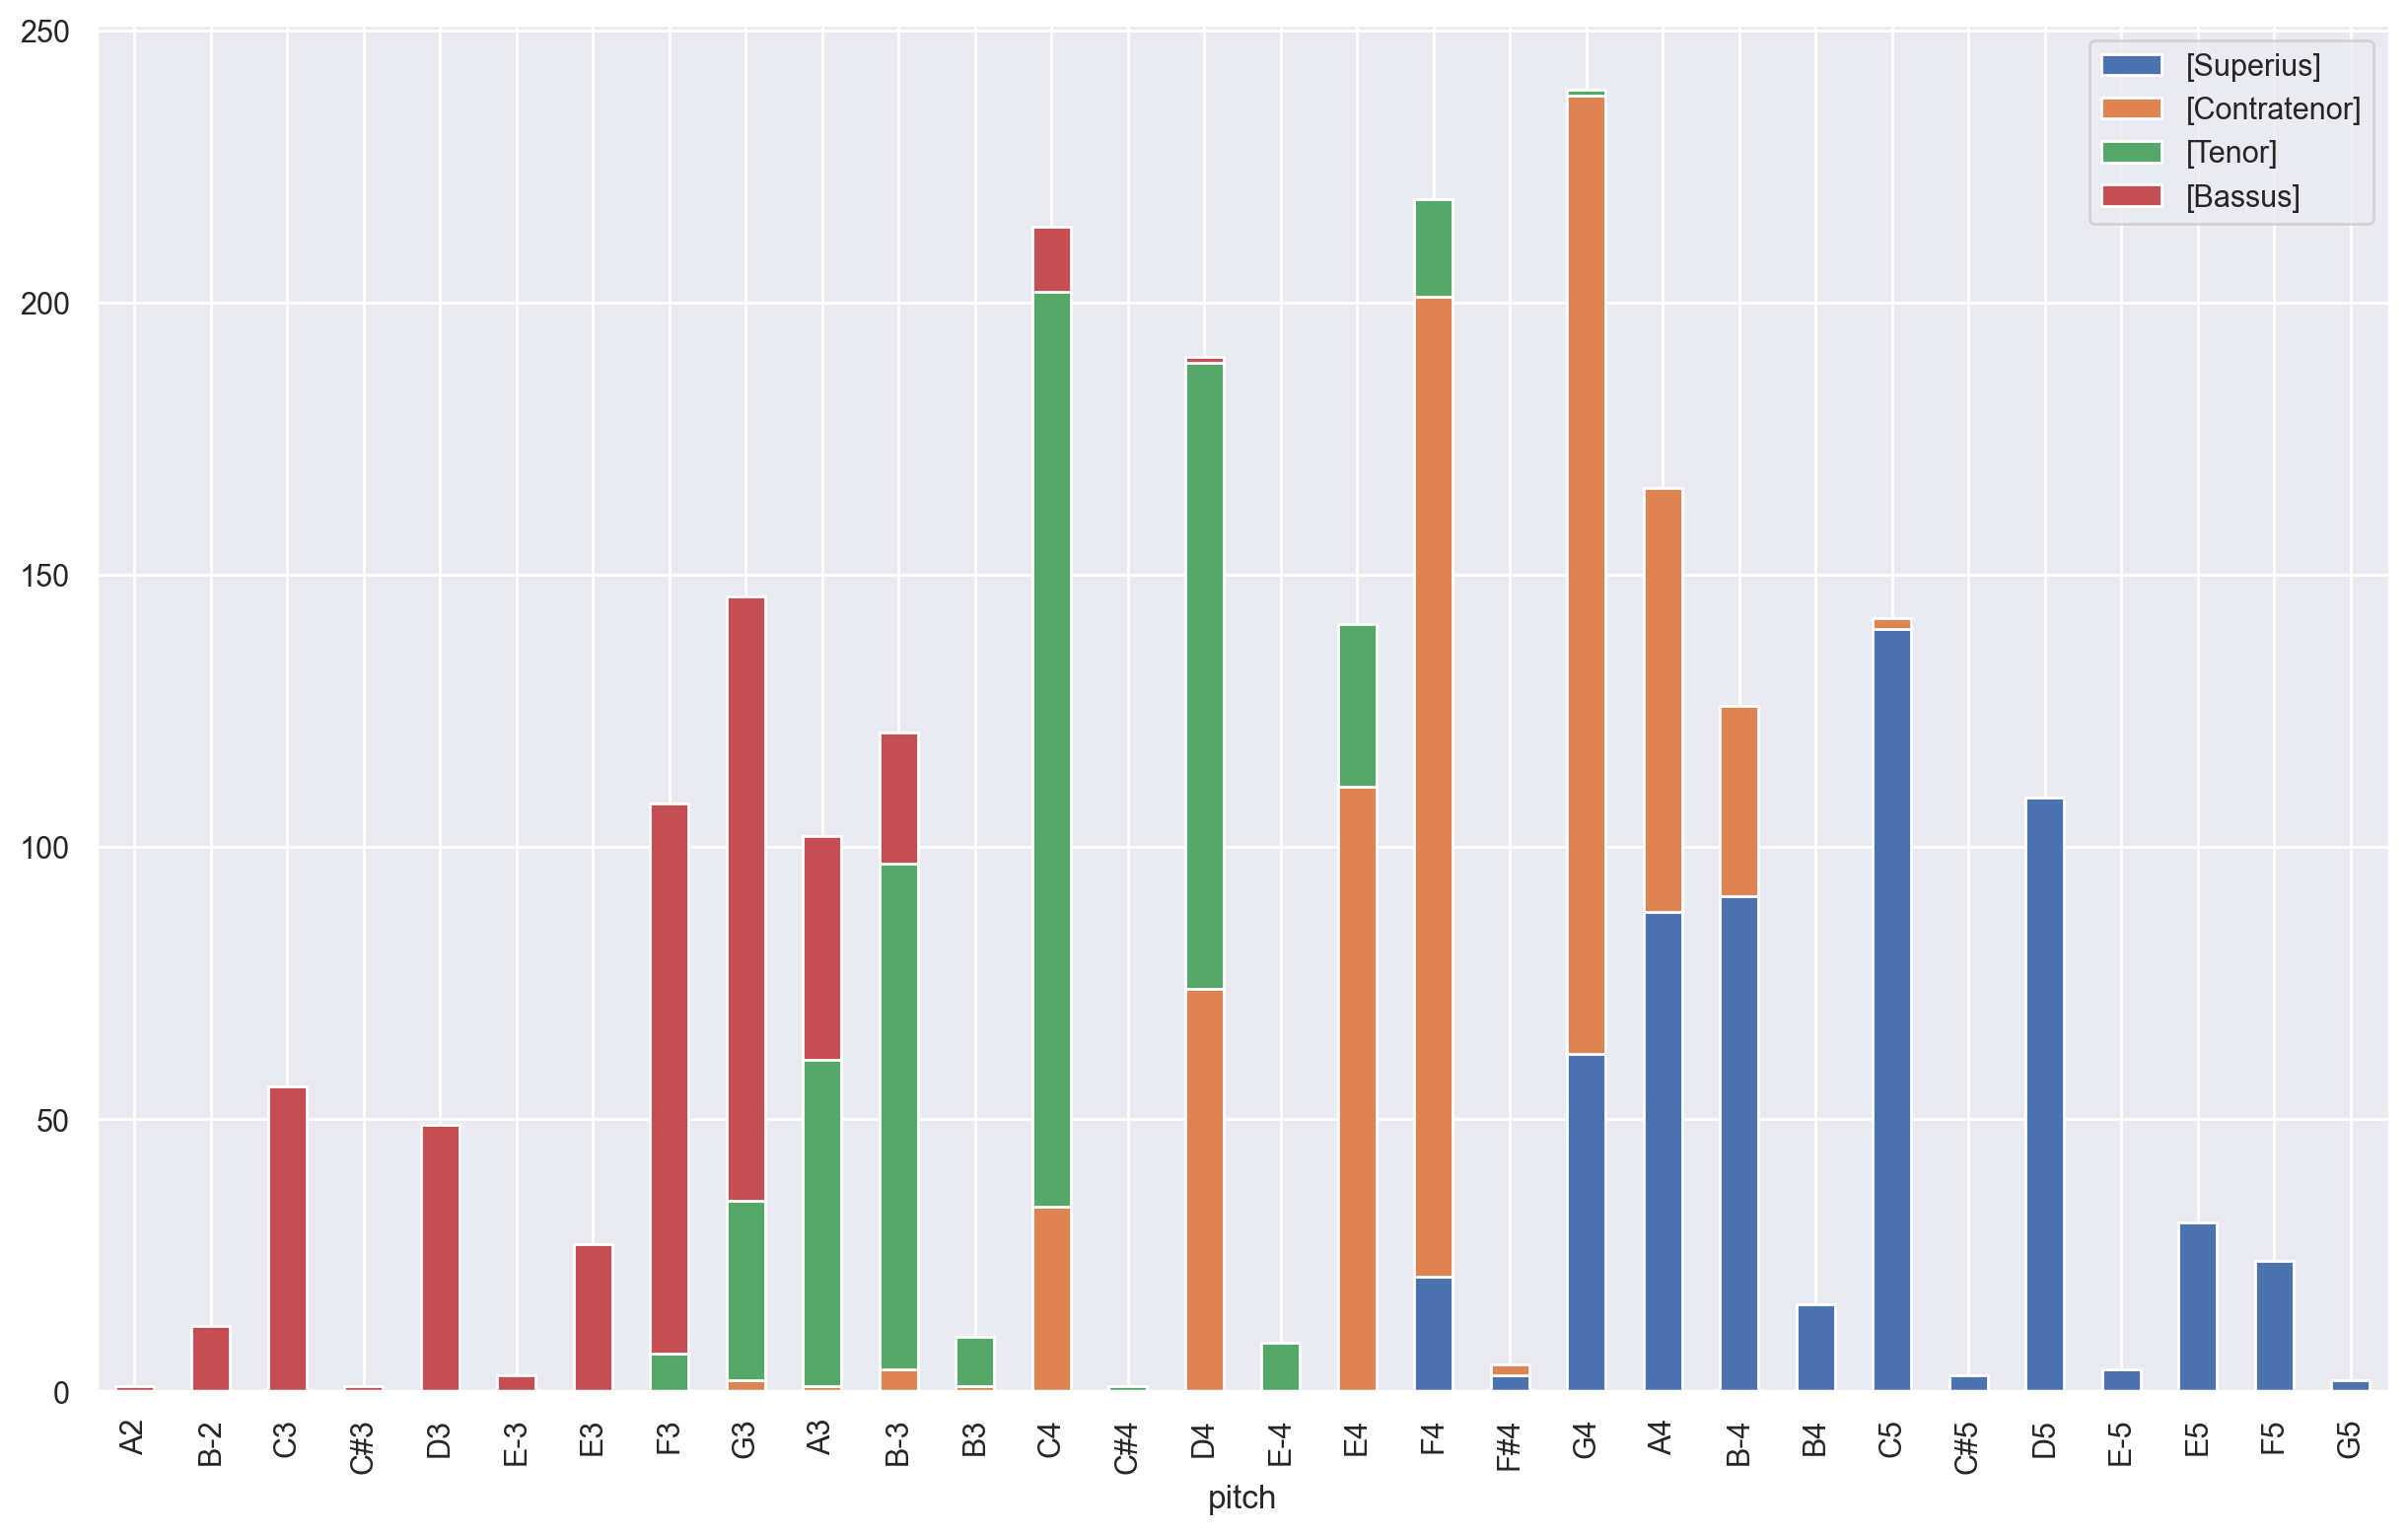

In [5]:
%matplotlib inline


# find the notes
nr = piece.notes().fillna('-')

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
nr = nr.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
nr.rename(columns = {'index':'pitch'}, inplace = True)

# apply the categorical list and sort
nr['pitch'] = pd.Categorical(nr["pitch"], categories=pitch_order)
nr = nr.sort_values(by = "pitch").dropna().copy()
voices = nr.columns.to_list()

# select color palette
palette = sns.husl_palette(len(voices), l=.4)

# create the dictionary key-value pairs
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)

# print the results

sns.set(rc={'figure.figsize':(15,9)})
nr.set_index('pitch').plot(kind='bar', stacked=True)


title : Missa Virginis Mariae: Credo
composer : Pierre Clereau
date : None


<AxesSubplot: xlabel='interval'>

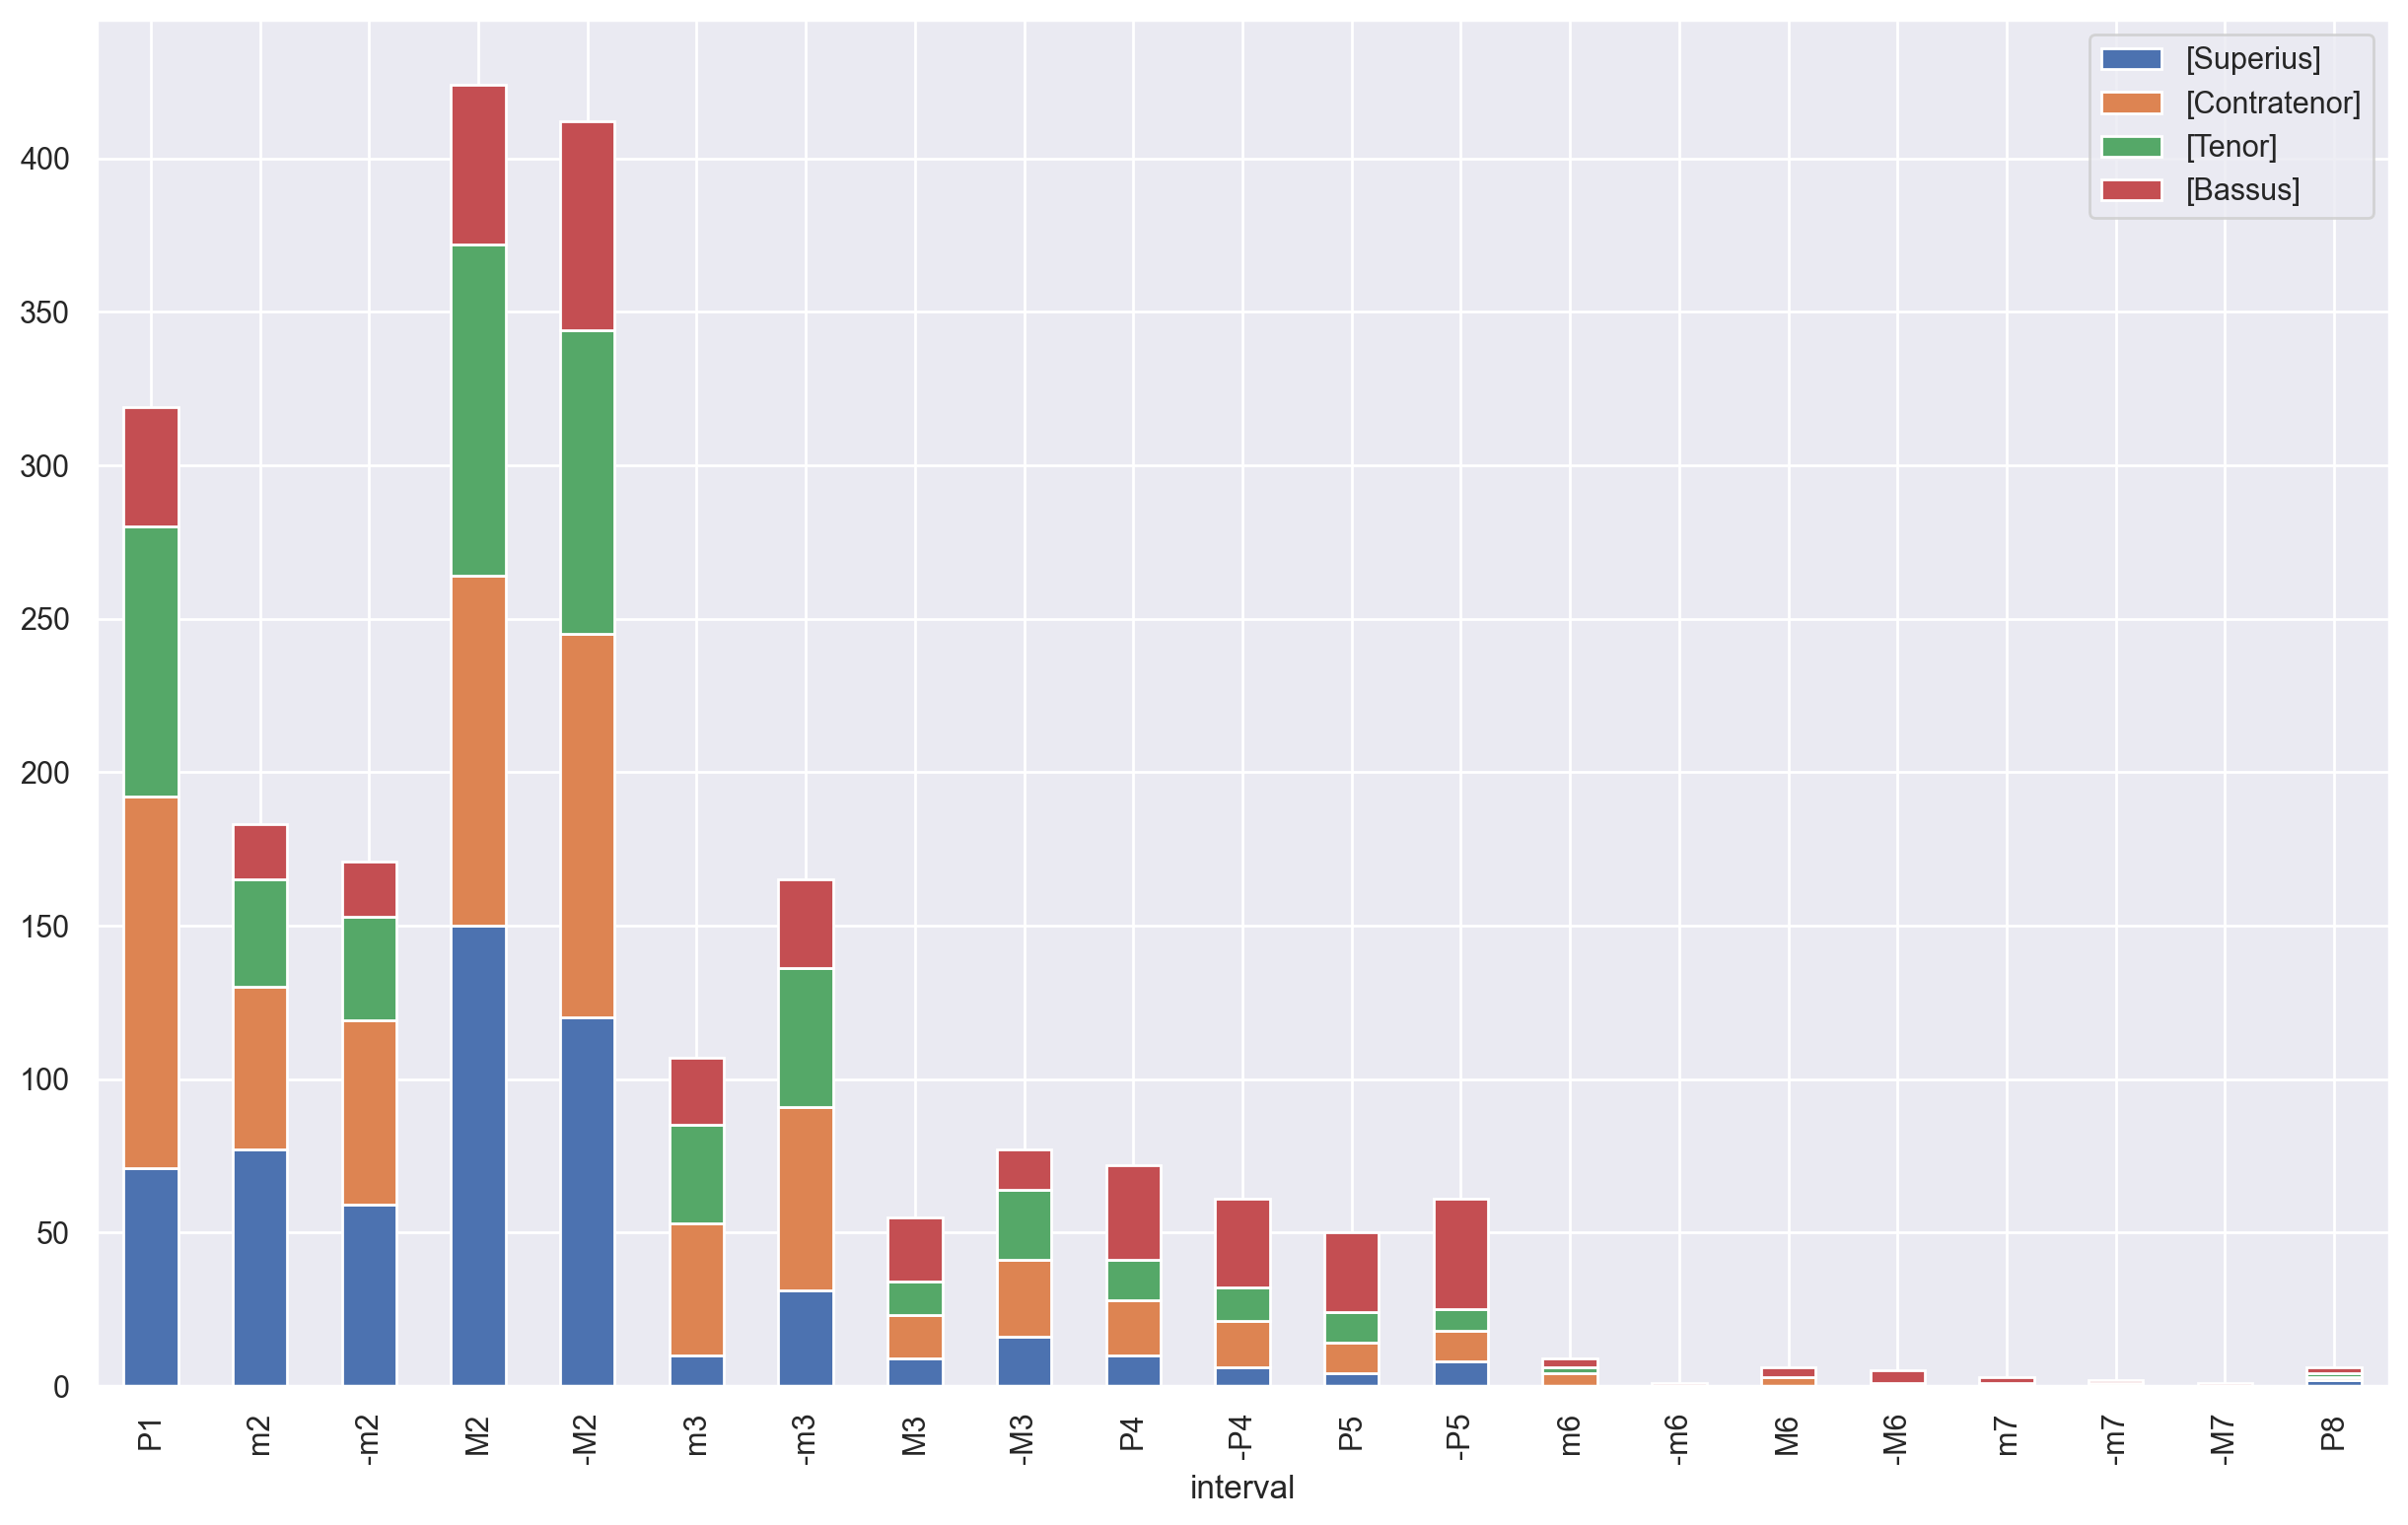

In [10]:
%matplotlib inline
int_order = ["P1", "m2", "-m2", "M2", "-M2", "m3", "-m3", "M3", "-M3", "P4", "-P4", "P5", "-P5", 
             "m6", "-m6", "M6", "-M6", "m7", "-m7", "M7", "-M7", "P8", "-P8"]
mel = piece.melodic()
mel = mel.fillna("-")
#count up the values in each item column--sum for each pitch.  
#make a copy 
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
#rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)
#apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()
voices = mel.columns.to_list()
#collect and print information about composer and piece
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)
#set the figure size, type and colors
palette = sns.husl_palette(len(voices), l=.4)
sns.set(rc={'figure.figsize':(15,9)})
mel.set_index('interval').plot(kind='bar', stacked=True)

### Note Map of a Single Piece

```
# find notes for model
notes = piece.notes(combineUnisons=True)
notes = notes.replace('Rest','')
notes_durs = piece.durations(notes)


print(piece.metadata)

display(viz.plot_ngrams_barchart(notes, notes_durs, 
                        selected_patterns=[],
                        voices=[]))
```

In [10]:
# find notes for model
notes = piece.notes(combineUnisons=True)
notes = notes.replace('Rest','')
notes_durs = piece.durations(notes)


print(piece.metadata)

display(viz.plot_ngrams_barchart(notes, notes_durs, 
                        selected_patterns=[],
                        voices=[]))

{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


alt.Chart(...)

### C. 3 Durations and Time Signatures
* We can use **`piece.durations()`** to tell us more about rhythms, and then combine the two dataframes into a synoptic view of the pitches and durations of the given piece.  Again, it is helpful to define this request as as variable that we can use later: **`dur = piece.durations().fillna('-')`**
<br>
* And of course we could **apply any of the tools noted above**, counting, sorting, etc, as needed.

* **Time Signatures** display each change of time signature with `piece.timeSignatures()`.  
* To see the **measure/beat index**, pass this to `piece.detailIndex()`:

>`ts = piece.timeSignatures()
piece.detailIndex(ts)`

In [13]:
ts = piece.timeSignatures()
di = piece.detailIndex(ts, offset=True)
di.index.get_level_values(2).to_list()

[0.0, 264.0, 280.0, 568.0]

In [94]:
nr = piece.notes()
dur = piece.durations().fillna('-')
dur

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,4.0,12.0,32.0,66.0,44.0
4.0,6.0,-,-,-,-
10.0,2.0,-,-,-,-
12.0,2.0,4.0,-,-,-
14.0,2.0,-,-,-,-
...,...,...,...,...,...
1065.0,-,-,-,-,1.0
1066.0,-,2.0,-,2.0,2.0
1068.0,-,4.0,-,4.0,2.0
1070.0,-,-,-,-,2.0


### C.4 Combining Notes and Durations in a Single Data Frame

* Two or more data frames can be combined into one. Here we can combine **`nr`** (our Notes and Rests) with **`dur`** to make a single data frame.  This frame can it self be given a new name:  

>`combined_notes_durs = pd.concat([nr, dur], axis=1)`


In [95]:
combined_notes_durs = pd.concat([nr, dur], axis=1)
combined_notes_durs.head()

,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus,Superius,Contratenor,PrimusTenor,SecundusTenor,Bassus
0.0,G4,Rest,Rest,Rest,Rest,4.0,12.0,32.0,66.0,44.0
4.0,D5,NaN,NaN,NaN,NaN,6.0,-,-,-,-
10.0,C5,NaN,NaN,NaN,NaN,2.0,-,-,-,-
12.0,D5,D4,NaN,NaN,NaN,2.0,4.0,-,-,-
14.0,F5,NaN,NaN,NaN,NaN,2.0,-,-,-,-


* We can also reorder the columns to put the information for each voice together.  Here we will use Pandas **iloc**, which is a way to refer to row or column by it's **index** number.  

* In Pandas the first row (or column) is **`0`**.  So to see just the notes_rests and durations for the Superius:
>`combined_notes_durs.iloc[:, [0, 4]]`

* To see all the voices reorganized in this way:  

>`combined_notes_durs.iloc[:, [0, 4, 1, 5, 2, 6, 3, 7]]`

In [96]:
comb = combined_notes_durs.iloc[:, [0, 4, 1, 5, 2, 6, 3, 7]]
comb["CCombined"] = comb[[0, 1]].apply("-".join, axis=1)

# comb['Cantus_Combined'] = combined_notes_durs[0] + combined_notes_durs[1]

KeyError: "None of [Int64Index([0, 1], dtype='int64')] are in the [columns]"

### C.5 Measures and Beats

* Music21(and therefore CRIM Intervals) measures time according to **offsets** (one offset = one quarter note). The very first offset in any piece is **0**. 

* Of course human readers will prefer identifying locations by **measure + beat addresses**
<br>

* To do this we 'pass' a name representing the first set of results **`combined_notes_durs`** to another method, **`detailIndex`**.  Thus:

>`piece.detailIndex(combined_notes_durs)`

* if you also would like to see the offsets, we include an additional "argument" in the parentheses: 

>` piece.detailIndex(combined_notes_durs, offset=True`

In [14]:

meas_beat = piece.detailIndex(combined_notes_durs)
meas_beat
# dur.to_csv('sib_out_test.csv')

pitch [Superius] Altus Tenor Bassus [Superius] Altus Tenor Bassus
Measure Beat                                                                  
1       1.0    NaN        NaN   NaN   NaN    NaN        4.0  16.0  32.0   48.0
        1.0     A2        0.0   0.0   0.0    4.0        NaN   NaN   NaN    NaN
        1.0     A3        0.0  21.0  12.0   18.0        NaN   NaN   NaN    NaN
        1.0     A4       23.0  10.0   4.0    0.0        NaN   NaN   NaN    NaN
        3.0    B-2        0.0   0.0   0.0    1.0        8.0     -     -      -
...            ...        ...   ...   ...    ...        ...   ...   ...    ...
149     1.0    NaN        NaN   NaN   NaN    NaN        8.0   4.0   8.0    8.0
        3.0    NaN        NaN   NaN   NaN    NaN          -   4.0     -      -
150     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0
151     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0
152     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0

[564 rows x 9 columns]

In [55]:
nr = piece.notes(combineUnisons = False,
                              combineRests = True)
mel = piece.melodic(df = nr, 
                    kind = 'd',
                    directed = True,
                    compound = True)#.fillna('')
# count up the values in each item column--sum for each pitch.  
# make a copy 
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)
# # apply the categorical list and sort.  
# if interval_kinds[select_kind] == 'q':
#     mel['interval'] = pd.Categorical(mel["interval"], categories=interval_order_quality)
mel = mel.sort_values(by = "interval").dropna().copy()
mel.index.rename('interval', inplace=True)
voices = mel.columns.to_list()
# set the figure size, type and colors
# display(px.bar(mel, x="interval", y=voices))


# now the 'transposed' version

# mel.T.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
# # rename the index column to something more useful
# mel_transposed.rename(columns = {'index':'voice'}, inplace = True)
# # apply the categorical list and sort.  
# # if interval_kinds[select_kind] == 'q':
#     # mel['interval'] = pd.Categorical(mel["interval"], categories=interval_order_quality)
# # mel_transposed = mel_transposed.sort_values(by = "voice").dropna().copy()
# mel_transposed.index.rename('voice', inplace=True)
# voices = mel_transposed.columns.to_list()

# display(px.bar(mel_transposed, x="voice", y='interval'))
mel_transposed = mel.T.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
mel_transposed.columns = list(mel_transposed.iloc[0])
# mel_transposed = mel_transposed.tail(-1)

mel_transposed.index.rename('voice', inplace=True)
intervals = mel_transposed.columns.to_list()
voices = mel.columns.to_list()
del voices[0]
mel_transposed

# display(px.bar(mel_transposed, x=voices, y='interval'))

,57,1,0,0,0,0,0,0,0,0,0,0,0,0
voice,,,,,,,,,,,,,,
0,57,1,0,0,0,0,0,0,0,0,0,0,0,0
1,83,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,78,1,0,0,0,0,0,1,0,0,0,0,0,0
4,103,1,0,0,0,0,0,0,0,0,0,0,0,0
5,23,0,2,0,0,0,0,0,0,0,0,0,0,0
6,16,0,1,0,0,0,0,0,0,0,0,0,0,0
7,-3,0,1,0,0,0,0,0,0,0,0,0,0,0
8,21,0,1,0,0,0,0,0,0,0,0,0,0,0


In [56]:
piece_list = []
raw_prefix = "https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/"
URL = "https://api.github.com/repos/CRIM-Project/CRIM-online/git/trees/990f5eb3ff1e9623711514d6609da4076257816c"
piece_json = requests.get(URL).json()
# pattern to filter out empty header Mass files
pattern = 'CRIM_Mass_([0-9]{4}).mei'

# and now the request for all the files
for p in piece_json["tree"]:
    p_name = p["path"]
    if re.search(pattern, p_name):
        pass
    else:
        piece_list.append(p_name)
        piece_list = sorted(piece_list)

In [57]:
piece_list

['CRIM_Mass_0001_1.mei',
 'CRIM_Mass_0001_2.mei',
 'CRIM_Mass_0001_3.mei',
 'CRIM_Mass_0001_4.mei',
 'CRIM_Mass_0001_5.mei',
 'CRIM_Mass_0002_1.mei',
 'CRIM_Mass_0002_2.mei',
 'CRIM_Mass_0002_3.mei',
 'CRIM_Mass_0002_4.mei',
 'CRIM_Mass_0002_5.mei',
 'CRIM_Mass_0003_1.mei',
 'CRIM_Mass_0003_2.mei',
 'CRIM_Mass_0003_3.mei',
 'CRIM_Mass_0003_4.mei',
 'CRIM_Mass_0003_5.mei',
 'CRIM_Mass_0004_1.mei',
 'CRIM_Mass_0004_2.mei',
 'CRIM_Mass_0004_3.mei',
 'CRIM_Mass_0004_4.mei',
 'CRIM_Mass_0004_5.mei',
 'CRIM_Mass_0005_1.mei',
 'CRIM_Mass_0005_2.mei',
 'CRIM_Mass_0005_3.mei',
 'CRIM_Mass_0005_4.mei',
 'CRIM_Mass_0005_5.mei',
 'CRIM_Mass_0006_1.mei',
 'CRIM_Mass_0006_2.mei',
 'CRIM_Mass_0006_3.mei',
 'CRIM_Mass_0006_4.mei',
 'CRIM_Mass_0006_5.mei',
 'CRIM_Mass_0007_1.mei',
 'CRIM_Mass_0007_2.mei',
 'CRIM_Mass_0007_3.mei',
 'CRIM_Mass_0007_4.mei',
 'CRIM_Mass_0007_5.mei',
 'CRIM_Mass_0008_1.mei',
 'CRIM_Mass_0008_2.mei',
 'CRIM_Mass_0008_3.mei',
 'CRIM_Mass_0008_4.mei',
 'CRIM_Mass_0008_5.mei',


In [64]:
import glob
for name in glob.glob('https://api.github.com/repos/CRIM-Project/CRIM-online/git/trees/990f5eb3ff1e9623711514d6609da4076257816c'):
    print(name)

In [74]:
URL = "https://api.github.com/repos/CRIM-Project/CRIM-online/git/trees/990f5eb3ff1e9623711514d6609da4076257816c"
raw_prefix = "https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/"

piece_json = requests.get(URL).json()
piece_path = piece_json['tree'][0]['path']

filepath = raw_prefix + piece_path
piece = importScore(filepath)


piece = importScore(piece_url)


# p_name = p["path"]
# if re.search(pattern, p_name):
#     pass
# else:
#     piece_list.append(p_name)
#     piece_list = sorted(piece_list)
# piece_list

Error downloading https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001.mei, please check your url and try again. Continuing to next file.
Import of https://api.github.com/repos/CRIM-Project/CRIM-online/git/blobs/64d6e41ddd48db7a347b4c65f02c60fe695528d1 failed, please check your file path/url.


In [4]:
prefix = 'https://crimproject.org/mei/'
piece_list =[]
crim_url = 'https://crimproject.org/data/pieces/'
all_pieces_json = requests.get(crim_url).json()
# and now the request for all the files
for p in all_pieces_json:
    p_name = p["piece_id"]
    piece_list.append(p_name)
piece_list = sorted(piece_list)
samples = piece_list[0:5]

samples


['CRIM_Mass_0001_1',
 'CRIM_Mass_0001_2',
 'CRIM_Mass_0001_3',
 'CRIM_Mass_0001_4',
 'CRIM_Mass_0001_5']

In [80]:
# functions
# get the mei link for one piece
# pass in the piece_id from the selected list
def find_mei_link(piece_id, json_objects):
    key_value_pair = ('piece_id', piece_id)
    for json_object in json_objects:
        if key_value_pair in json_object.items():
            return json_object['mei_links'][0]
    return None
# get list of all pieces for selector

def make_piece_list(json_objects):
    piece_list = []
    for piece in json_objects:
        file_name = piece['piece_id']
        piece_list.append(file_name)
   
    return piece_list
    
def make_composer_title_list(json_objects):
    composer_title_list = []
    for piece in json_objects:
        composer_title = piece['composer']['name'] + ', ' + piece['full_title'] 
        composer_title_list.append(composer_title)
    return composer_title_list

# get list of pieces
import json
piece_list =[]
crim_url = 'https://crimproject.org/data/pieces/'
all_pieces_json = requests.get(crim_url).json()
json_str = json.dumps(all_pieces_json)
json_objects = json.loads(json_str)

# json_objects

In [86]:
piece_name = 'CRIM_Model_0001'

In [87]:
find_mei_link(piece_name, json_objects)

'https://crimproject.org/mei/CRIM_Model_0001.mei'

In [82]:
piece_list = make_composer_title_list(json_objects)
# piece_list

In [95]:
mei_link = 'https://crimproject.org/mei/CRIM_Model_0001.mei'
r = requests.get(mei_link)
with open('CRIM_Model_0001' + '.mei', 'r') as f:
    data = f.read()
    f.write('CRIM_Model_0001.mei')
data


UnsupportedOperation: not writable

In [85]:
piece_id

NameError: name 'piece_id' is not defined

'<?xml version="1.0" encoding="UTF-8"?>\n<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>\n<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>\n<mei xmlns="http://www.music-encoding.org/ns/mei" meiversion="4.0.1" xml:id="m-1">\n   <meiHead xml:id="m-2">\n      <fileDesc xml:id="m-3">\n         <titleStmt><title>Veni speciosam</title><respStmt><persName role="composer" auth="VIAF" auth.uri="http://viaf.org/viaf/42035469">Johannes Lupi</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Bonnie Blackburn</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName></respStmt></titleStmt><pubStmt><publisher>\n      Citations: The Renaissance Imitation Mass Project\n  </publisher><distributor>Centre d\'Études Supérieures 

In [39]:
json_objects[75]

{'url': 'https://crimproject.org/data/pieces/CRIM_Mass_0006_1/',
 'piece_id': 'CRIM_Mass_0006_1',
 'title': 'Kyrie',
 'full_title': 'Missa Je suis déshéritée: Kyrie',
 'genre': {'url': 'https://crimproject.org/data/genres/mass/',
  'name': 'Mass movement'},
 'pdf_links': ['https://crimproject.org/pdf/CRIM_Mass_0006_1.pdf'],
 'mei_links': ['https://crimproject.org/mei/CRIM_Mass_0006_1.mei'],
 'composer': {'url': 'https://crimproject.org/data/people/CRIM_Person_0018/',
  'name': 'Jean Guyon'},
 'date': '1556',
 'date_sort': 1556,
 'number_of_voices': 4,
 'remarks': ''}

In [18]:
def find_json_object(key_value_pair, json_objects):
    for json_object in json_objects:
        if key_value_pair in json_object.items():
            return json_object['mei_links']
    return None

In [19]:
desired_key_value_pair = ('piece_id', 'CRIM_Model_0001',)
result = find_json_object(desired_key_value_pair, json_objects)
print(result)

['https://crimproject.org/mei/CRIM_Model_0001.mei']


In [17]:
result['mei_links']

['https://crimproject.org/mei/CRIM_Model_0001.mei']